In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [20]:
im = Image.open("asset_praktikum_akbar.jpg").resize((255,255))
im2 = Image.open("asset_praktikum_akbar.jpg").resize((255,255))
arr = np.array(im.copy())
arrEq = np.zeros(arr.shape, dtype= np.uint8)

In [21]:
keys = np.arange(256)
histOri = np.zeros((256), dtype=np.uint32)
histEq = np.zeros((256), dtype=np.uint32)

In [22]:
for y in range(arr.shape[0]):
    for x in range(arr.shape[1]):
        akum = (int(arr[y,x,0])+int(arr[y,x,1])+int(arr[y,x,2]))
        tmp = max(min(int(akum/3),255),0)
        arr[y,x] =[tmp,tmp,tmp]
        histOri[tmp] = histOri[tmp]+1;

In [23]:
cdf = histOri.cumsum()
cdf_normalized = cdf * float(histOri.max()) / cdf.max()
transform_map = np.floor((255 * cdf)/(arr.shape[0]*arr.shape[1])).astype(np.uint8)

In [24]:
for y in range (arr.shape[0]):
    for x in range (arr.shape[1]):
        tmpR = transform_map[arr[y,x,0]]
        tmpG = transform_map[arr[y,x,1]]
        tmpB = transform_map[arr[y,x,2]]
        arrEq[y,x] = [tmpR,tmpG,tmpB]
        tmp = np.floor((arrEq[y,x].sum()/3)).astype(np.uint8)
        histEq[tmp] = histEq[tmp]+1

In [25]:
cdfeq = histEq.cumsum()
cdfeq_normalized = cdfeq * float(histEq.max())/cdfeq.max()

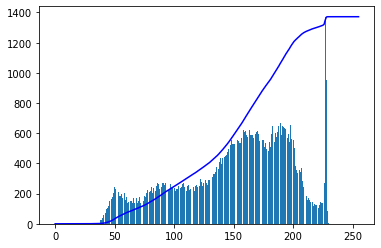

In [26]:
fig = plt.figure(1)
plt.bar(keys,histOri)
plt.plot(cdf_normalized, color = 'b')
fig.canvas.draw()
dataOri = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
dataOri = dataOri.reshape(fig.canvas.get_width_height()[::-1]+(3,))
histImageOri = Image.fromarray(dataOri).resize((255,255))
histNpOri = np.array(histImageOri)

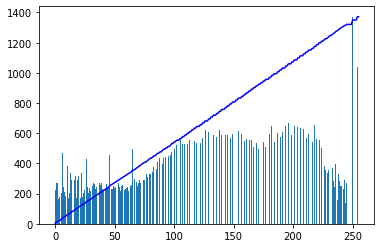

In [27]:
fig = plt.figure(2)
plt.bar(keys,histEq)
plt.plot(cdfeq_normalized, color = 'b')
fig.canvas.draw()
dataEq = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
dataEq = dataEq.reshape(fig.canvas.get_width_height()[::-1]+(3,))
histImageEq = Image.fromarray(dataEq).resize((255,255))
histNpEq = np.array(histImageEq)

In [30]:
Image.fromarray(np.hstack((np.vstack((histNpOri,arr)),np.vstack((histNpEq,arrEq))))).show()